[0, 14.8, 28.14, 40.545, 51.04, 59.105, 67.38, 74.49, 81.19, 86.665, 91.595, 96.865, 101.08, 105.63, 109.455, 113.345, 117.065, 120.03, 123.16, 126.125, 129.105, 131.935, 134.46, 137.42, 140.22, 142.605, 145.28, 147.8, 150.34, 152.825, 155.0, 157.605, 159.895, 162.09, 164.12, 166.31, 168.62, 170.86, 172.92, 175.01, 177.155, 179.06, 181.13, 183.17, 185.1, 187.005, 189.01, 190.85, 192.485, 194.32, 196.045, 198.055, 199.715, 201.4, 203.325, 205.03, 206.665, 208.3, 209.885, 211.68, 213.37, 214.98, 216.695, 218.27, 219.99, 221.57, 223.21, 224.97, 226.59, 228.245, 229.885, 231.59, 233.125, 234.65, 236.035, 237.58, 239.03, 240.495, 241.895, 243.31, 244.8, 246.415, 248.03, 249.57, 250.87, 252.315, 253.75, 255.29, 256.83, 258.17, 259.62, 261.06, 262.42, 263.845, 265.28, 266.61, 268.03, 269.61, 271.07, 272.48, 273.8, 275.2, 276.445, 277.83, 279.125, 280.35, 281.725, 282.99, 284.315, 285.59, 286.825, 288.195, 289.475, 290.77, 292.01, 293.38, 294.565, 295.835, 297.065, 298.235, 299.485, 300.735, 3

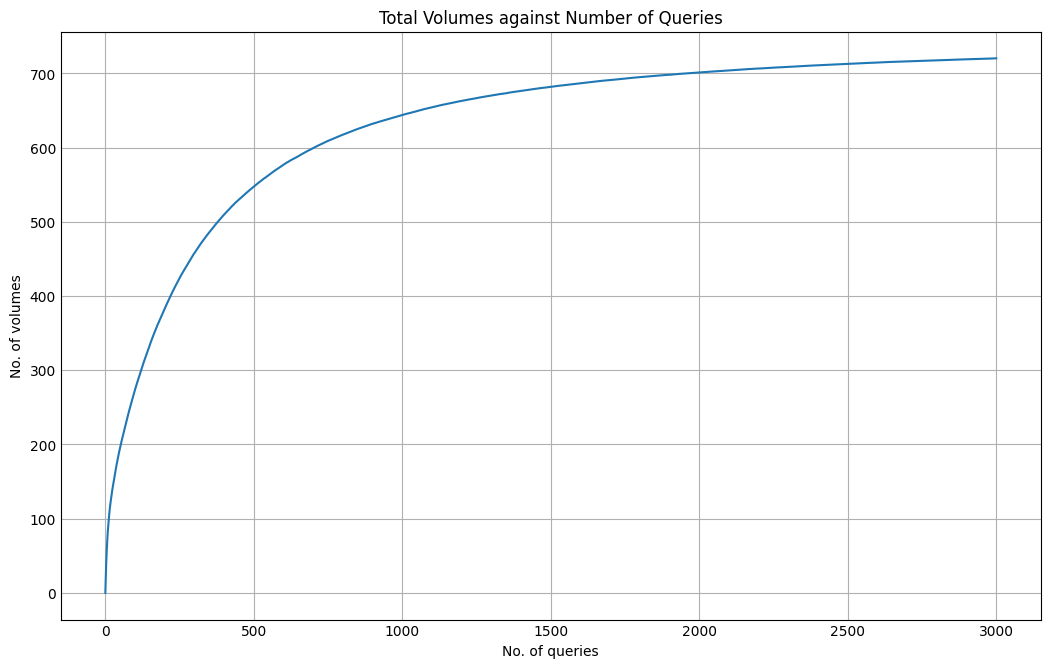

In [ ]:
import math 
import random 
import matplotlib.pyplot as plt 

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random(1, RSEmax-no_range+1)
    query = (first_int, first_int+1)
    return(query)



def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(int(math.log(RSEmax, 2)+1)):
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i+1) !=  1:
                break
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return(query_list)





RSEmax = 256
max_volumes = int(RSEmax*2 - 1)
no_of_runs = 200
no_of_queries = 1800
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()



